### 【TaskD】Basic practice of sckit-learn
- student id:111524019
- name：陳品蓁


#### 分數分配：Q1(70%), Q2(30%)

#### 【Q1】請跟著影片的步驟，進行KNN演算法的實作，請注意以下限制：
   ##### 1. 請使用下方的breast_cancer dataset 或其他sckit-learn toy datasets做練習，而不是iris data(若想使用其他toy dataset 可以參考: https://scikit-learn.org/stable/datasets/toy_dataset.html)
   ##### 2. 請輸出y_pred和準確率(accuracy)並評估此模型是否是個好模型
   ####  3. 請針對此資料找出最合適的n_neighborsinth參數

#### 【Q1】Please follow the video instruction to do the practice about KNN. Following the directions:
   ##### 1. You can choose to use the breast_cancer dataset below or any other sckit-learn toy datasets but not iris data(If you want to know how to use the other toy datasets, please check out: https://scikit-learn.org/stable/datasets/toy_dataset.html)
   ##### 2. Please print y_pred and accuracy, and evaluate whether your model is a good model or not.
   #####  3.Please find the most suitable n_neighbors parameter for this data.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
bc=datasets.load_breast_cancer()
type(bc)
print(bc.keys())
#用load取datasets資料 後面接要的資料名稱
#格式可以用keys()看到裡面成的資料有['data', 'target', 'frame', 
#'target_names', 'DESCR', 'feature_names', 'filename']

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
type(bc.data),type(bc.target)

(numpy.ndarray, numpy.ndarray)

In [3]:
bc.data.shape
#可以查看大小

(569, 30)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

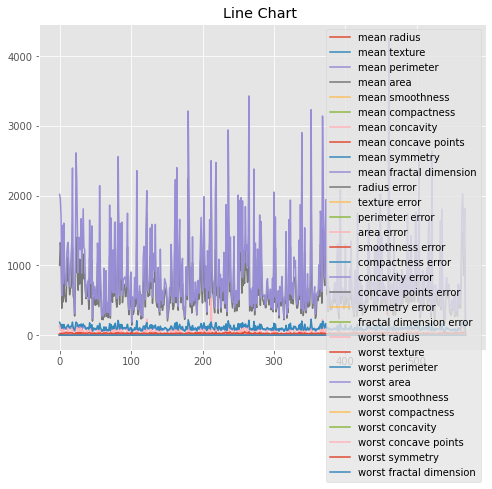

In [111]:
X=bc.data
Y=bc.target
df=pd.DataFrame(X,columns=bc.feature_names)
print(df) #列出完整的欄位與資料表數值
df.plot(kind='line',title='Line Chart ',figsize=(8,6))
plt.show()

In [6]:
bc['data'].shape

(569, 30)

In [7]:
bc['target'].shape

(569,)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(bc['data'],bc['target'])
#建立一個分類氣使用knn的方法

KNeighborsClassifier(n_neighbors=6)

In [16]:
X_NEW=np.array([[6.981,9.71,43.79,143.5,0.053,0.019,0.0,0.0,0.106,0.05,0.112,
                0.36,0.757,6.802,0.002,0.002,0.0,0.0,0.008,0.001,7.93,12.02,
                50.41,185.2,0.071,0.027,0.0,0.0,0.156,0.055],
               [28.11,39.28,188.5,2501.0,0.163,0.345,0.427,0.201,0.304,0.097,
                2.873,4.885,21.98,542.2,0.031,0.135,0.396,0.053,0.079,0.03,
                36.04,49.54,251.2,4254.0,0.223,1.058,1.252,0.291,0.664,0.208]
               ])
prediction=knn.predict(X_NEW)
print('Prediction:{}'.format(prediction))
#可以將輸入的資料進行類別的分類，判斷屬於哪一類別

Prediction:[1 0]


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=21,stratify=Y)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("prediction:\\n {}".format(y_pred))

prediction:\n [1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1
 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0]


In [32]:
knn.score(x_test,y_test)
#將模型進行評分

0.9239766081871345

0.9298245614035088
0.8947368421052632
0.9239766081871345
0.9239766081871345
0.9239766081871345
0.9239766081871345
0.9239766081871345
0.9239766081871345
0.9181286549707602
0.9181286549707602
0.9122807017543859
0.9122807017543859
0.9064327485380117
0.9064327485380117


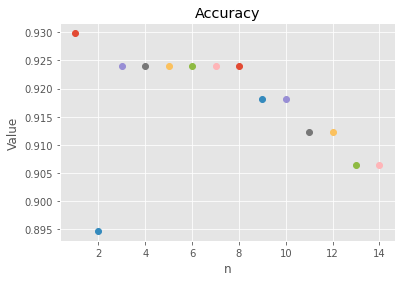

In [110]:
for i in range(1,15):#找出選取數字在1-15這個範圍裡面的準確值各是多少
    knn=KNeighborsClassifier(n_neighbors=i)
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=21,stratify=Y)
    knn.fit(x_train,y_train)
    prevalue=knn.score(x_test,y_test)
    print(knn.score(x_test,y_test))
#可以知道找鄰近的值n在3-8都是準確度在0.9239766081871345最高的準確度範圍
    plt.plot(i,prevalue,'-o')
    plt.xlabel('n')
    plt.ylabel('Value')
    plt.title('Accuracy')
plt.show()


#### 【Q2】請至少使用一種KNN以外的"分類"演算法(e.g.Random Forest,SVM,logistic regression...)進行Q1的實作：
   ##### 1. 請輸出y_pred和準確率並評估此模型是否是個好模型
   ##### 2. 其他演算法的操作可以參考任何網路上的資料，或參考: https://scikit-learn.org/stable/supervised_learning.html

#### 【Q2】Please use at least one algorithm different from KNN(e.g.Random Forest, SVM, logistic regression...) to do Q1：
   ##### 1. Please print y_pred and accuracy, and evaluate whether your model is a good model
   ##### 2. You can check out any reference information from internet to find the operation of other algorithms or follow https://scikit-learn.org/stable/supervised_learning.html

In [44]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X,Y)
#使用線性回歸的演算法

BayesianRidge()

In [46]:
reg.predict(X_NEW)

array([ 1.6336123 , -0.53149592])

In [47]:
reg.coef_

array([ 1.04989316e-01, -6.59878601e-03,  2.73068361e-03, -9.21913012e-04,
       -2.67090090e-01,  5.42778458e-01, -3.85599721e-01, -6.76510054e-01,
       -1.19279378e-01,  1.31306582e-02, -3.81762872e-01, -2.15115659e-02,
        7.83950557e-03,  1.12435787e-03, -2.01240168e-01,  2.15909577e-01,
        8.23784175e-01, -9.48199098e-02, -9.29592122e-02,  1.56848002e-02,
       -2.22779880e-01, -5.55565379e-03,  3.46179459e-03,  1.15761814e-03,
       -9.01531615e-01,  4.49458569e-02, -3.49439869e-01, -1.01200925e+00,
       -5.00119262e-01, -3.04277859e-01])

In [49]:
y_pred=reg.predict(X_NEW)
print('Prediction:{}'.format(prediction))
#使用這個跟knn分類的結果是一樣的

Prediction:[1 0]


In [100]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=21,stratify=Y)
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print("prediction:\\n {}".format(y_pred))

prediction:\n [ 0.76264979  0.55934801  1.04686598  0.29306379  0.31677819 -0.44867344
  0.41230367  0.64877364  1.03585862  0.8719604   0.95131102  0.10189101
  0.8554112   0.15311177  0.9769288   0.70533727  0.31988446  0.6908651
 -0.03917744  0.11263601  0.8405939   0.84908242  0.21705979  0.55020028
  1.09662246 -0.20503795 -1.34655916  0.79995203  0.89455356  1.07949127
  0.60643003  0.68913926  1.04364476  1.18069036  0.32297483 -0.42313407
  1.00427218  0.9531728   1.1111723   0.15229645  0.06557699  0.88351004
 -0.09809532  1.00705794  0.9347589   0.92169273  0.83601642  0.73621347
  0.14292703  0.72132468  0.14121494  0.5693217  -0.00857137  0.16778349
  0.76485343  0.98712498  1.11403778  0.05100346  0.24655157  0.72641778
  1.07963314  0.2275455   0.18221862  1.0583125   1.02904994  0.44147864
  1.27975502  1.04750343  0.89125779  0.94442161  0.17051452  0.53079628
  0.37977498  0.27645267  0.00503936  0.98233817  1.04157624  0.57678218
  1.02764516  1.0973011   0.59984065  

In [102]:
reg.score(x_test,y_test)
#分數較低的原因有可能是數值之間本來線性關係不大

0.6819727491070553